In [146]:
from bs4 import BeautifulSoup
# import xml.etree.ElementTree as et
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
xml_files = glob('Data/xml2/*.xml')
print(len(xml_files))
    

112039


In [20]:
xml_files[0]

'Data/xml2\\0000001_SK-A-4878.xml'

In [99]:
with open(xml_files[0], 'r') as f:
    data = f.read()
    
bs_data = BeautifulSoup(data, "xml")

In [100]:
print(bs_data.prettify())
# bs_data

<?xml version="1.0" encoding="utf-8"?>
<record>
 <header>
  <identifier>
   oai:rijksmuseum.nl/collection:SK-A-4878
  </identifier>
  <datestamp>
   2012-10-26T09:44:37Z
  </datestamp>
 </header>
 <metadata>
  <dc>
   <format>
    https://www.rijksmuseum.nl/assetimage2.jsp?id=SK-A-4878
   </format>
   <format>
    https://www.rijksmuseum.nl/nl/collectie/SK-A-4878
   </format>
   <identifier>
    SK-A-4878
   </identifier>
   <identifier>
    RM0001.COLLECT.2
   </identifier>
   <language>
    Dutch
   </language>
   <publisher>
    Rijksmuseum
   </publisher>
   <rights>
    http://creativecommons.org/publicdomain/zero/1.0/
   </rights>
   <date>
    1644 -  1648
   </date>
   <description>
    Een jonge vrouw haar handen warmend boven gloeiende kolen in een aardewerken vuurtest. Waarschijnlijk een allegorie op het seizoen Winter. De vrouw draagt een witte muts, oorbellen en een parelsnoer.
   </description>
   <format>
    hoogte 97 CMcmcm
   </format>
   <format>
    breedte 81 CMcmc

In [106]:
# bs_data.find('metadata').find('identifier')
unordered_list = bs_data.find("dc")
print(unordered_list)

<dc>
<format>https://www.rijksmuseum.nl/assetimage2.jsp?id=SK-A-4878</format>
<format>https://www.rijksmuseum.nl/nl/collectie/SK-A-4878</format>
<identifier>SK-A-4878</identifier>
<identifier>RM0001.COLLECT.2</identifier>
<language>Dutch</language>
<publisher>Rijksmuseum</publisher>
<rights>http://creativecommons.org/publicdomain/zero/1.0/</rights>
<date>1644 -  1648</date>
<description>Een jonge vrouw haar handen warmend boven gloeiende kolen in een aardewerken vuurtest. Waarschijnlijk een allegorie op het seizoen Winter. De vrouw draagt een witte muts, oorbellen en een parelsnoer.</description>
<format>hoogte 97 CMcmcm</format>
<format>breedte 81 CMcmcm</format>
<format>diepte 8 CMcmcm</format>
<format>materiaal: olieverf</format>
<format>materiaal: doek</format>
<creator> schilder: Everdingen, Caesar BoÃ«tius van</creator>
<coverage>Nederland</coverage>
<type>schilderij</type>
<title>Een jonge vrouw haar handen warmend boven een vuurtest, mogelijk een allegorie op de Winter</title>


In [131]:
def remove_tags(bs_data, tag):
    node = bs_data.find('metadata').find(tag)
    if node:
        string = ''.join(node.stripped_strings)
    else:
        string = ':'
#     string = string.split(':')[1]
    return string

In [132]:
creator = remove_tags(bs_data, 'creator').split(':')[1]
creator

' Everdingen, Caesar BoÃ«tius van'

In [133]:
identifier = remove_tags(bs_data, 'identifier')
identifier

'SK-A-4878'

In [136]:
def create_df(xml_files):
    tags = []
    all_items = []
    
    for i in range(len(xml_files)):
        if i % 1000 == 0:
            print(str(round(i/len(xml_files)*100, 3)) + '%')
            
        with open(xml_files[i], 'r', encoding="utf8") as f:
            data = f.read()
            
        bs_data = BeautifulSoup(data, "xml")
        
        identifier = remove_tags(bs_data, 'identifier')
        creator = remove_tags(bs_data, 'creator').split(':')[1]
        title = remove_tags(bs_data, 'title')
        year = remove_tags(bs_data, 'year')
        art_type = remove_tags(bs_data, 'type')
#         creators[identifier] = creator
        tags = [identifier, creator, title, year, art_type]
        all_items.append(tags)
        
    df = pd.DataFrame(all_items, columns=['Identifier', 'Creator', 'Title', 'Year', 'Type'])
#     return pd.DataFrame.from_dict(creators)
    return df
        

In [137]:
creators = create_df(xml_files)

0.0%
0.893%
1.785%
2.678%
3.57%
4.463%
5.355%
6.248%
7.14%
8.033%
8.925%
9.818%
10.711%
11.603%
12.496%
13.388%
14.281%
15.173%
16.066%
16.958%
17.851%
18.743%
19.636%
20.529%
21.421%
22.314%
23.206%
24.099%
24.991%
25.884%
26.776%
27.669%
28.561%
29.454%
30.347%
31.239%
32.132%
33.024%
33.917%
34.809%
35.702%
36.594%
37.487%
38.379%
39.272%
40.165%
41.057%
41.95%
42.842%
43.735%
44.627%
45.52%
46.412%
47.305%
48.198%
49.09%
49.983%
50.875%
51.768%
52.66%
53.553%
54.445%
55.338%
56.23%
57.123%
58.016%
58.908%
59.801%
60.693%
61.586%
62.478%
63.371%
64.263%
65.156%
66.048%
66.941%
67.834%
68.726%
69.619%
70.511%
71.404%
72.296%
73.189%
74.081%
74.974%
75.866%
76.759%
77.652%
78.544%
79.437%
80.329%
81.222%
82.114%
83.007%
83.899%
84.792%
85.684%
86.577%
87.47%
88.362%
89.255%
90.147%
91.04%
91.932%
92.825%
93.717%
94.61%
95.502%
96.395%
97.288%
98.18%
99.073%
99.965%


In [138]:
creators = creators.set_index('Identifier')
creators

,Creator,Title,Year,Type
Identifier,,,,
SK-A-4878,"Everdingen, Caesar Boëtius van",Een jonge vrouw haar handen warmend boven een ...,:,schilderij
SK-A-4877,"Maris, Matthijs",Portret van Jacob Maris,:,schilderij
SK-A-4881,"Maes, Nicolaes","Portret van een jonge man, waarschijnlijk Simo...",:,schilderij
RP-P-1992-35,"Coornhert, Dirck Volckertsz",Keizer Karel V omgeven door zijn overwonnen te...,:,prent
RP-P-1992-36,"Coornhert, Dirck Volckertsz",Gevangename van Frans I tijdens de slag van Pa...,:,prent
...,...,...,...,...
AK-RBK-14763-A-2,anoniem,Schotel beschilderd met lotusranken en een kra...,:,schotel
RP-P-OB-86.512,"Bos, Maarten",Beschieting van het Nederlandse oorlogsschip M...,:,prent
NG-NM-7753,anoniem,Inktpot met deksel,:,inktpot


In [142]:
creators.to_csv('xml_files_filtered.csv', index=False)

In [139]:
unique_creators = creators['Creator'].unique()

In [140]:
len(unique_creators)

6622

In [182]:
grouped = creators.groupby('Creator').count()

grouped = grouped.sort_values('Title', ascending=False)['Title']
# selection = grouped
grouped = grouped.reset_index()
grouped = grouped.drop([0, 11])
grouped

,Creator,Title
1,"Luyken, Jan",1928
2,"Picart, Bernard",1504
3,Rembrandt Harmensz. van Rijn,1384
4,"Fokke, Simon",1267
5,"Houbraken, Jacob",1148
...,...,...
6617,"Knoll, François Cornelis",1
6618,"Knop, N.",1
6619,"Knuppe, Henk",1
6620,"Kobell, Franz",1


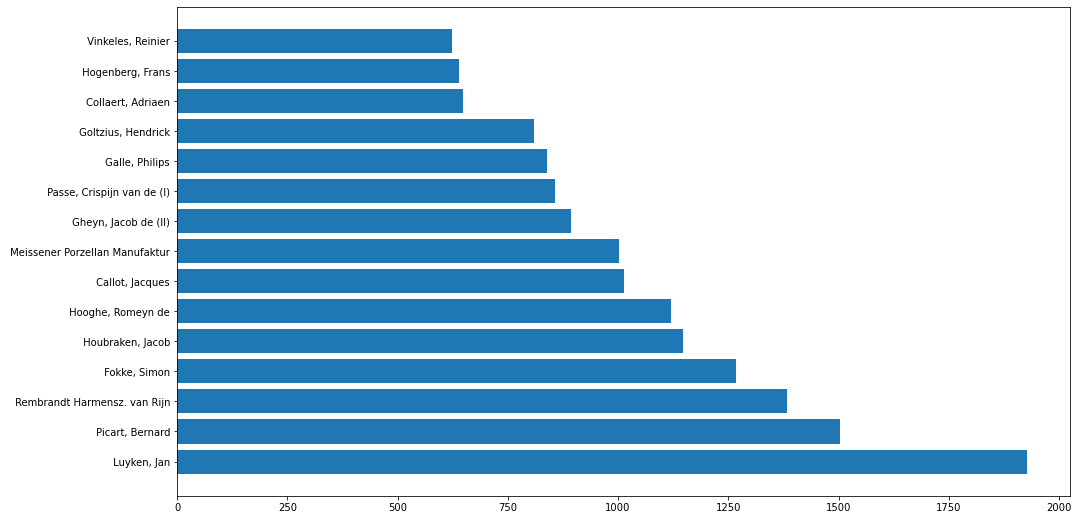

In [183]:
fig, ax = plt.subplots(figsize =(16, 9))
# plt.bar(selection['Creator'], selection['Title'])
ax.barh(grouped['Creator'][:15], grouped['Title'][:15])
plt.show()

In [186]:
grouped[grouped['Title'] >= 10].sum()

Creator     Luyken, Jan Picart, Bernard Rembrandt Harmens...
Title                                                  82620
dtype: object